# Blaise NINDENKIMANA

# Databeez Hack2Hire Challenge

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import dill
from sklearn.model_selection import train_test_split,KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline


# 1. Explore the Data

In [95]:
# Load the CSV file uploaded by the user
csv_file_path = '/home/aimssn-it/Desktop/Databeez/german_credit_data.csv'

# Read the CSV file
data = pd.read_csv(csv_file_path)

# Display the first few rows and basic information about the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(include='all').T,
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


{'head':    Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
 0           0   67    male    2     own             NaN           little   
 1           1   22  female    2     own          little         moderate   
 2           2   49    male    1     own          little              NaN   
 3           3   45    male    2    free          little           little   
 4           4   53    male    2    free          little           little   
 
    Credit amount  Duration              Purpose  Risk  
 0           1169         6             radio/TV  good  
 1           5951        48             radio/TV   bad  
 2           2096        12            education  good  
 3           7882        42  furniture/equipment  good  
 4           4870        24                  car   bad  ,
 'info': None,
 'description':                    count unique     top freq      mean          std    min  \
 Unnamed: 0        1000.0    NaN     NaN  NaN     499.5   288.819436    0.0 

In [96]:
data=data.drop(['Unnamed: 0'],axis=1)

In [97]:
data.shape

(1000, 10)

In [98]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [99]:
# Rename the columns to maintain consistency
data.rename(columns={'Age':'age',
                    'Sex':'sex',
                    'Job':'job',
                    'Housing':'housing',
                    'Saving accounts':'saving_accounts',
                    'Checking account':'checking_account',
                    'Credit amount':'credit_amount',
                    'Duration':'duration',
                    'Purpose':'purpose',
                    'Risk':'risk'
                    },
            inplace=True)

In [100]:
# numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols

['age', 'job', 'credit_amount', 'duration']

In [101]:
# categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols

['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose', 'risk']

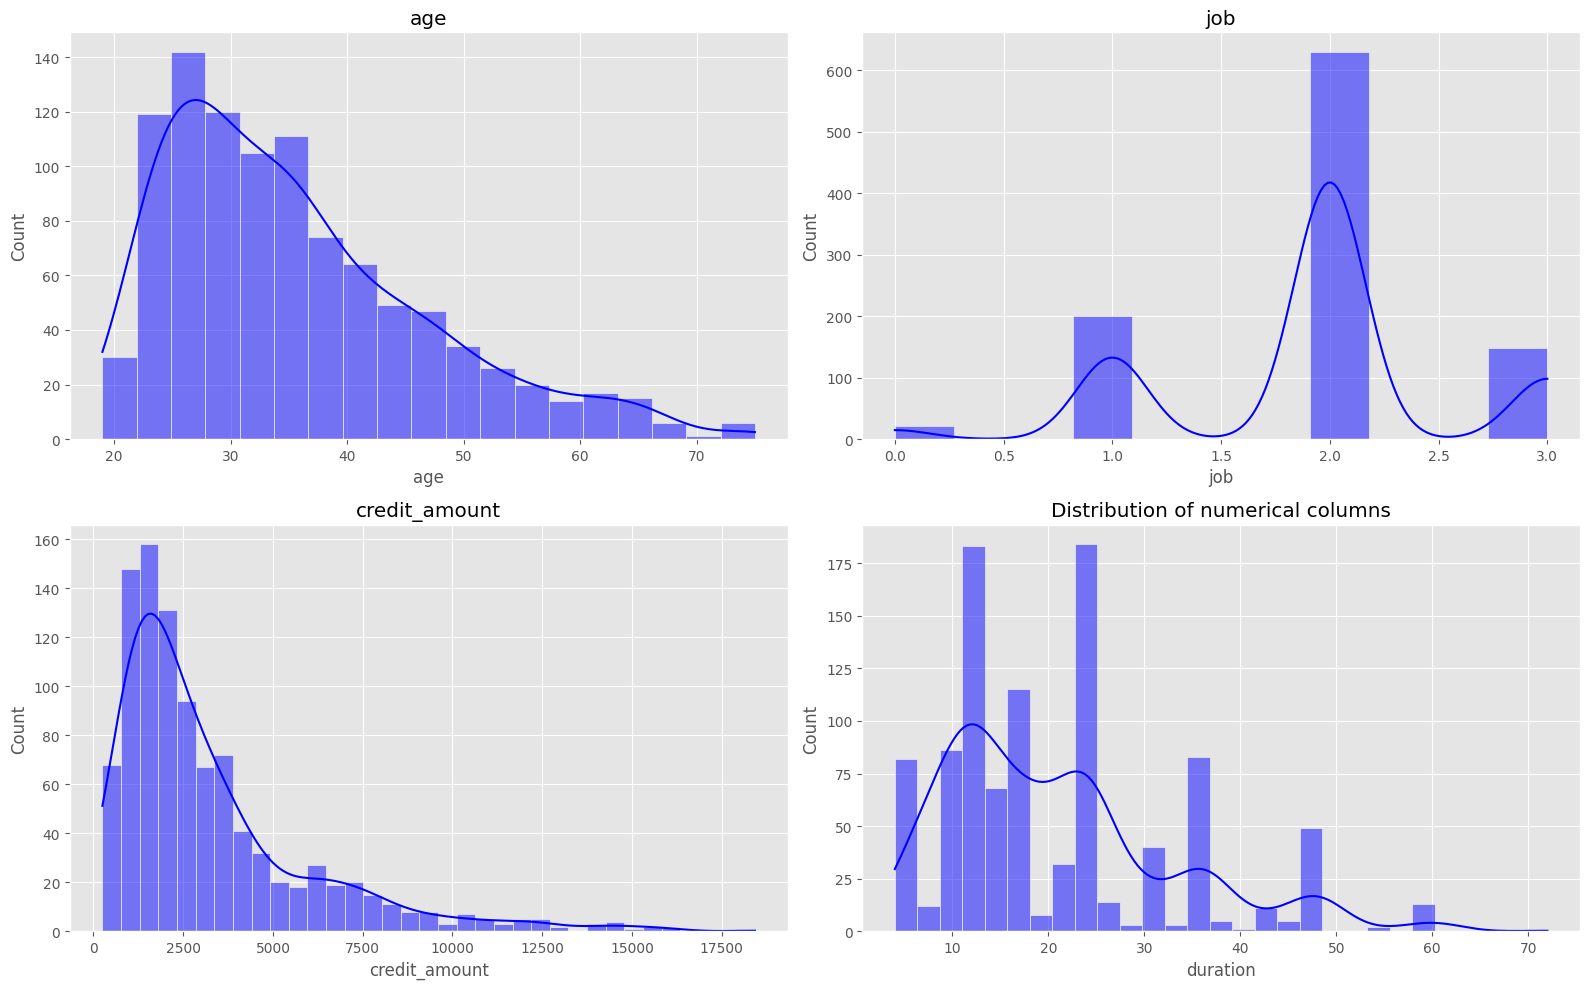

In [102]:
# Distribution of numerical columns

plt.figure(figsize=(16,10))
for colname in enumerate(num_cols):
    plt.subplot(2,2,colname[0]+1)
    sns.histplot(data[colname[1]], kde=True,color='blue')
    plt.title(colname[1])
    plt.tight_layout()
plt.tight_layout()
plt.title('Distribution of numerical columns')
plt.show()

The numerical variables are not normally distributed. Example Age and credit amount are left skewed.
We need to apply transformations so that data will be normally distributed.

In [103]:
# Make numerical variables normally distributed
data['age'] = np.sqrt(data['age'])
data['credit_amount'] = np.sqrt(data['credit_amount'])
data['duration'] = np.sqrt(data['duration'])
data['job'] = np.sqrt(data['job'])



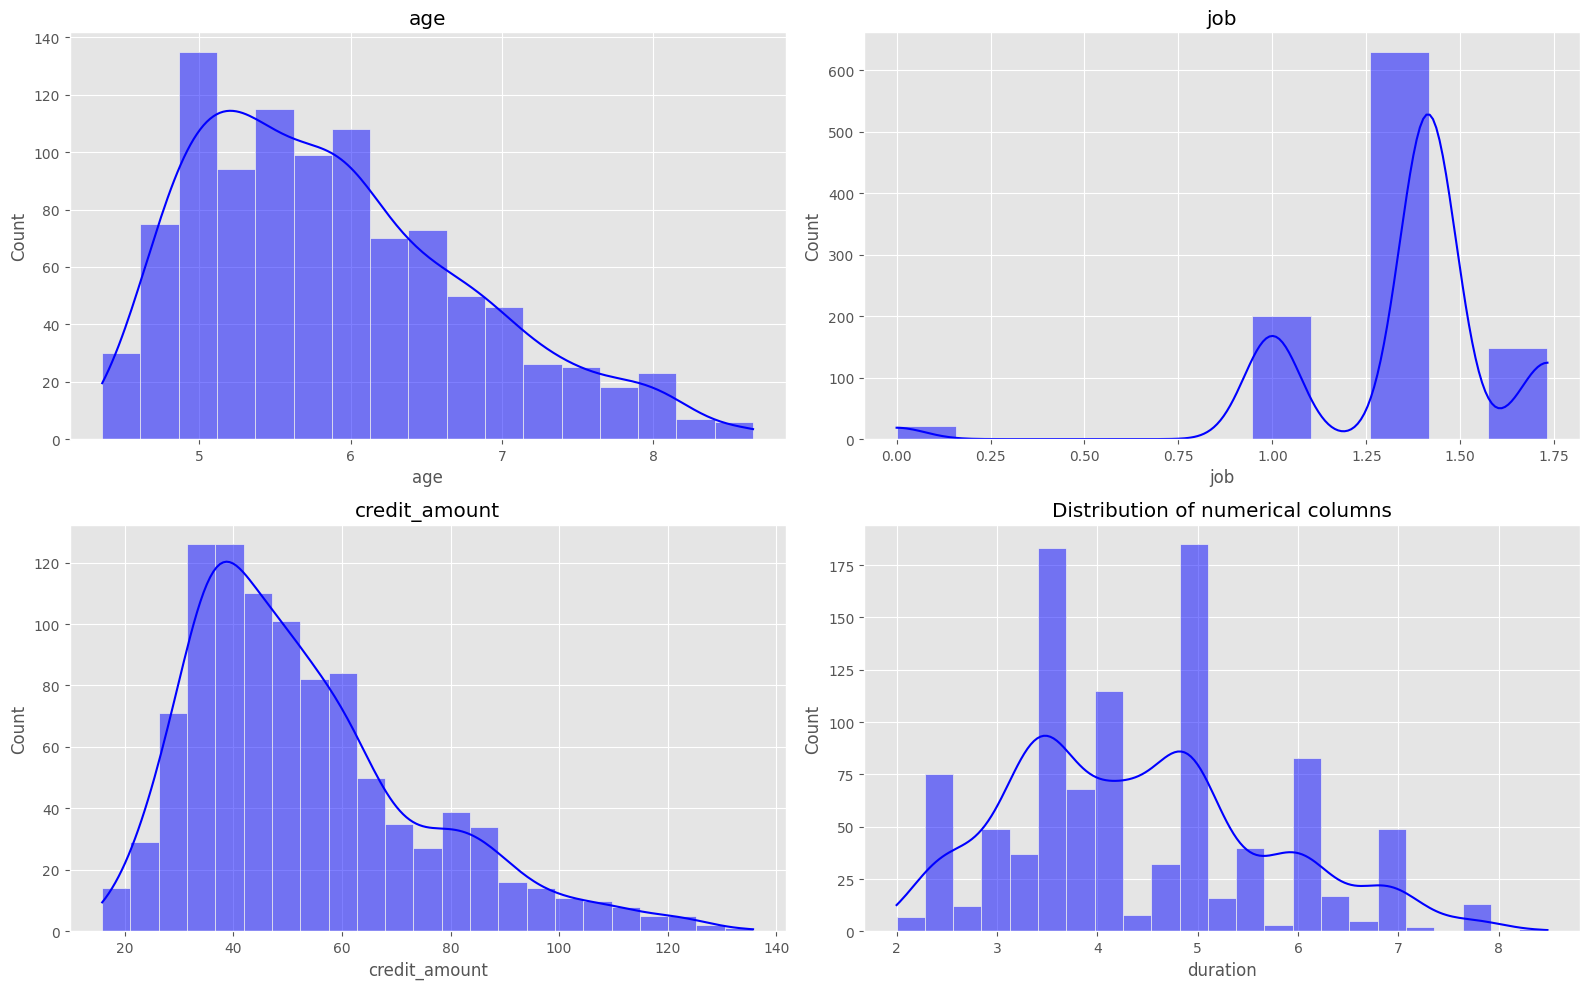

In [104]:
plt.figure(figsize=(16,10))
for colname in enumerate(data[num_cols]):
    plt.subplot(2,2,colname[0]+1)
    sns.histplot(data[colname[1]], kde=True, color='blue')
    plt.title(colname[1])
    plt.tight_layout()
plt.tight_layout()
plt.title('Distribution of numerical columns')
plt.show()

In [105]:
data['risk'].value_counts()

risk
good    700
bad     300
Name: count, dtype: int64

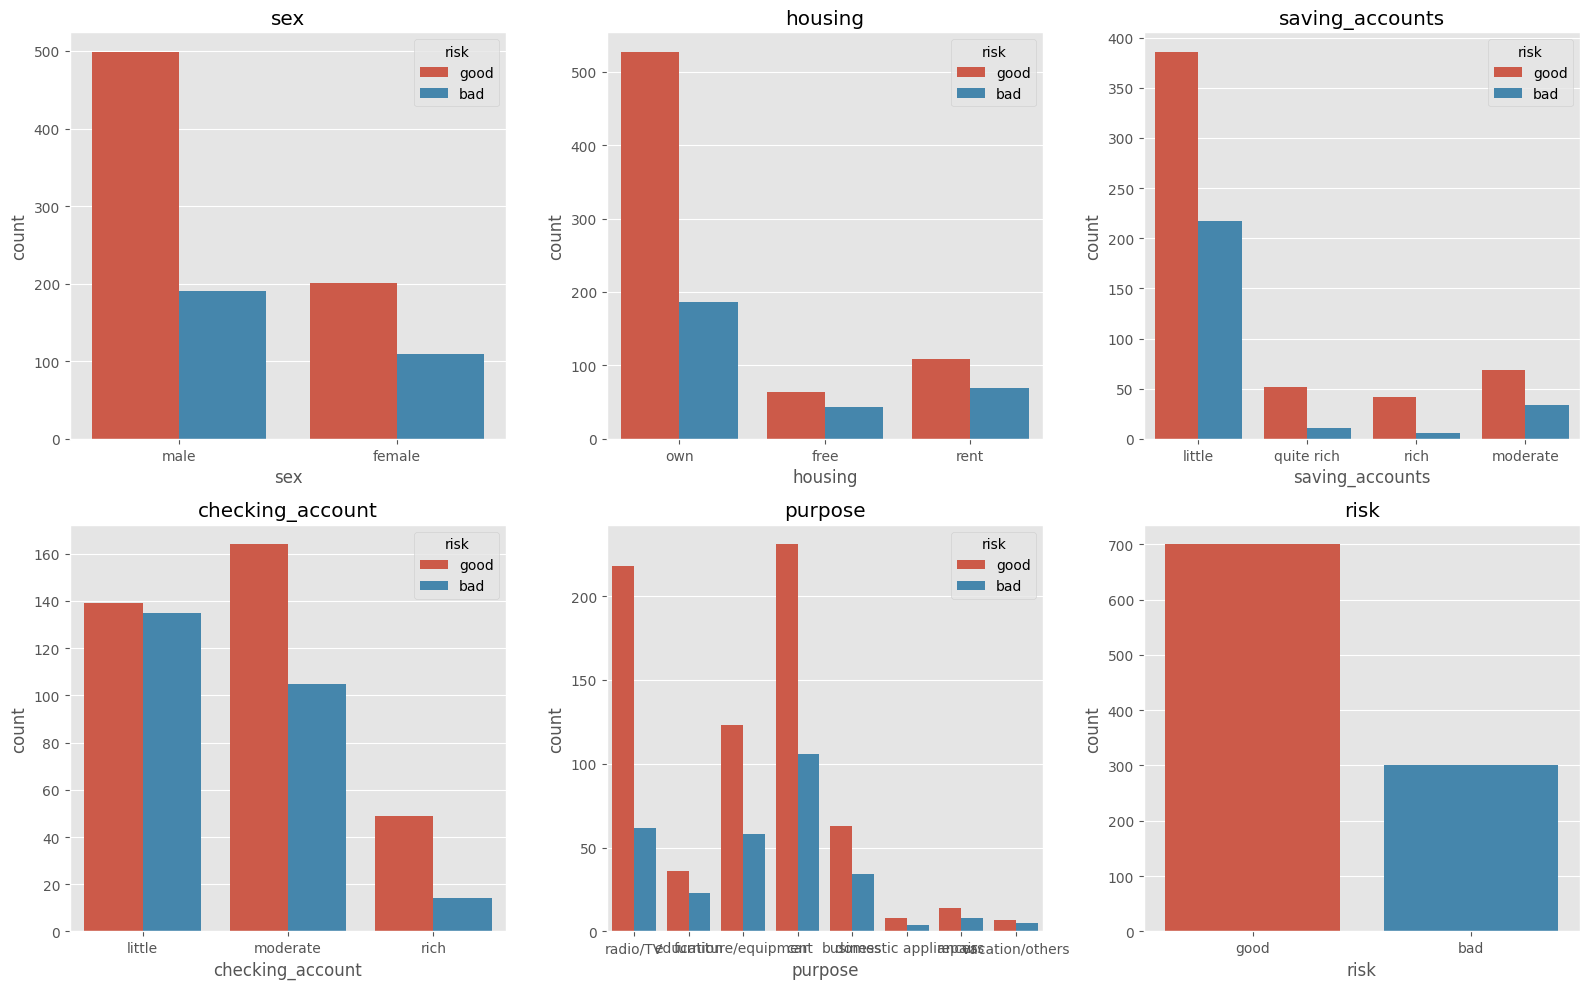

In [106]:
# distribution of categorical columns
plt.figure(figsize=(16,10))
for colname in enumerate(cat_cols):
    plt.subplot(2,3,colname[0]+1)
    sns.countplot(x=data[colname[1]], data=data,hue='risk')
    plt.title(colname[1])
    plt.tight_layout()

In [107]:
data['job'].unique()

array([1.41421356, 1.        , 1.73205081, 0.        ])

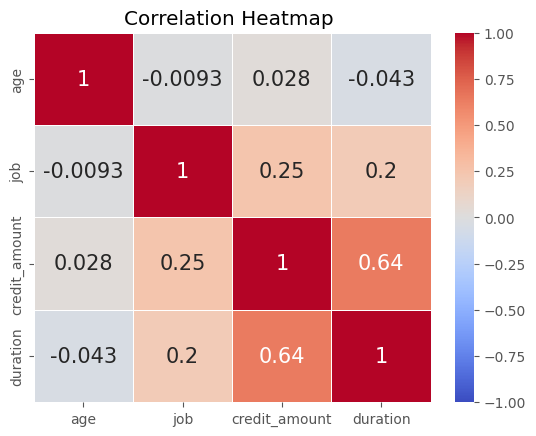

In [108]:
figsize=(12,8)
sns.heatmap(data.select_dtypes(['number']).corr(),
            annot=True,
            cmap='coolwarm',
            cbar=True,
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1,
            linewidths=.4)
plt.title("Correlation Heatmap ")
plt.show()

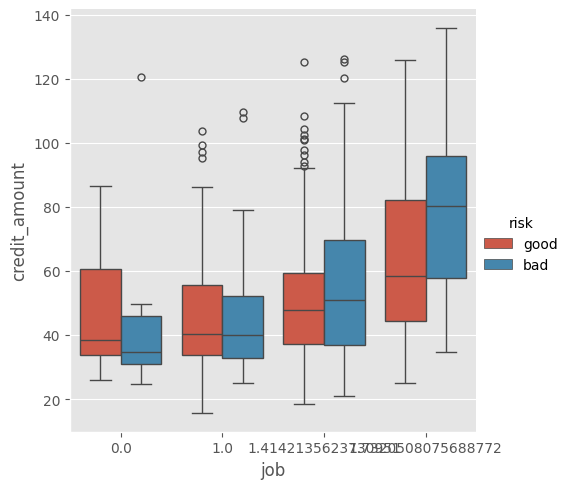

In [109]:
sns.catplot(x='job', y='credit_amount', data=data, kind='box', hue='risk')
plt.show()

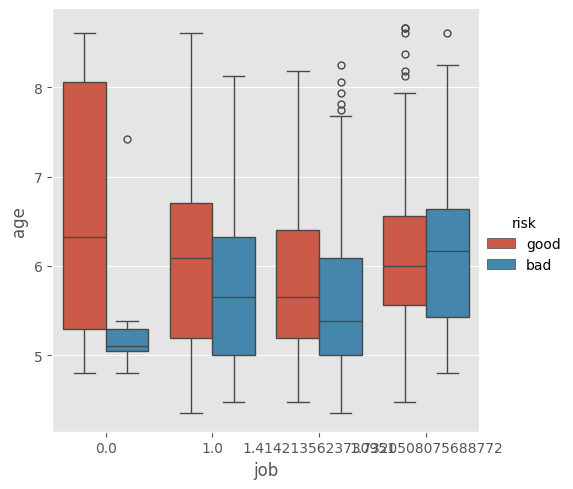

In [110]:
sns.catplot( x='job',y='age', data=data, kind='box', hue='risk')
plt.show()

In [111]:
# Generate a profiling report
profile = ProfileReport(data, title="Credit Risk Germany Data Profiling Report", explorative=True)

# Display the profiling report
profile.to_file("credit_risk_germany_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Since Age and Duration are left skewed, we are going to make them normally distributed with:
- data['Age']= np.log1p(data['Age']) or 
- data['Age'] = np.sqrt(data['Age'])

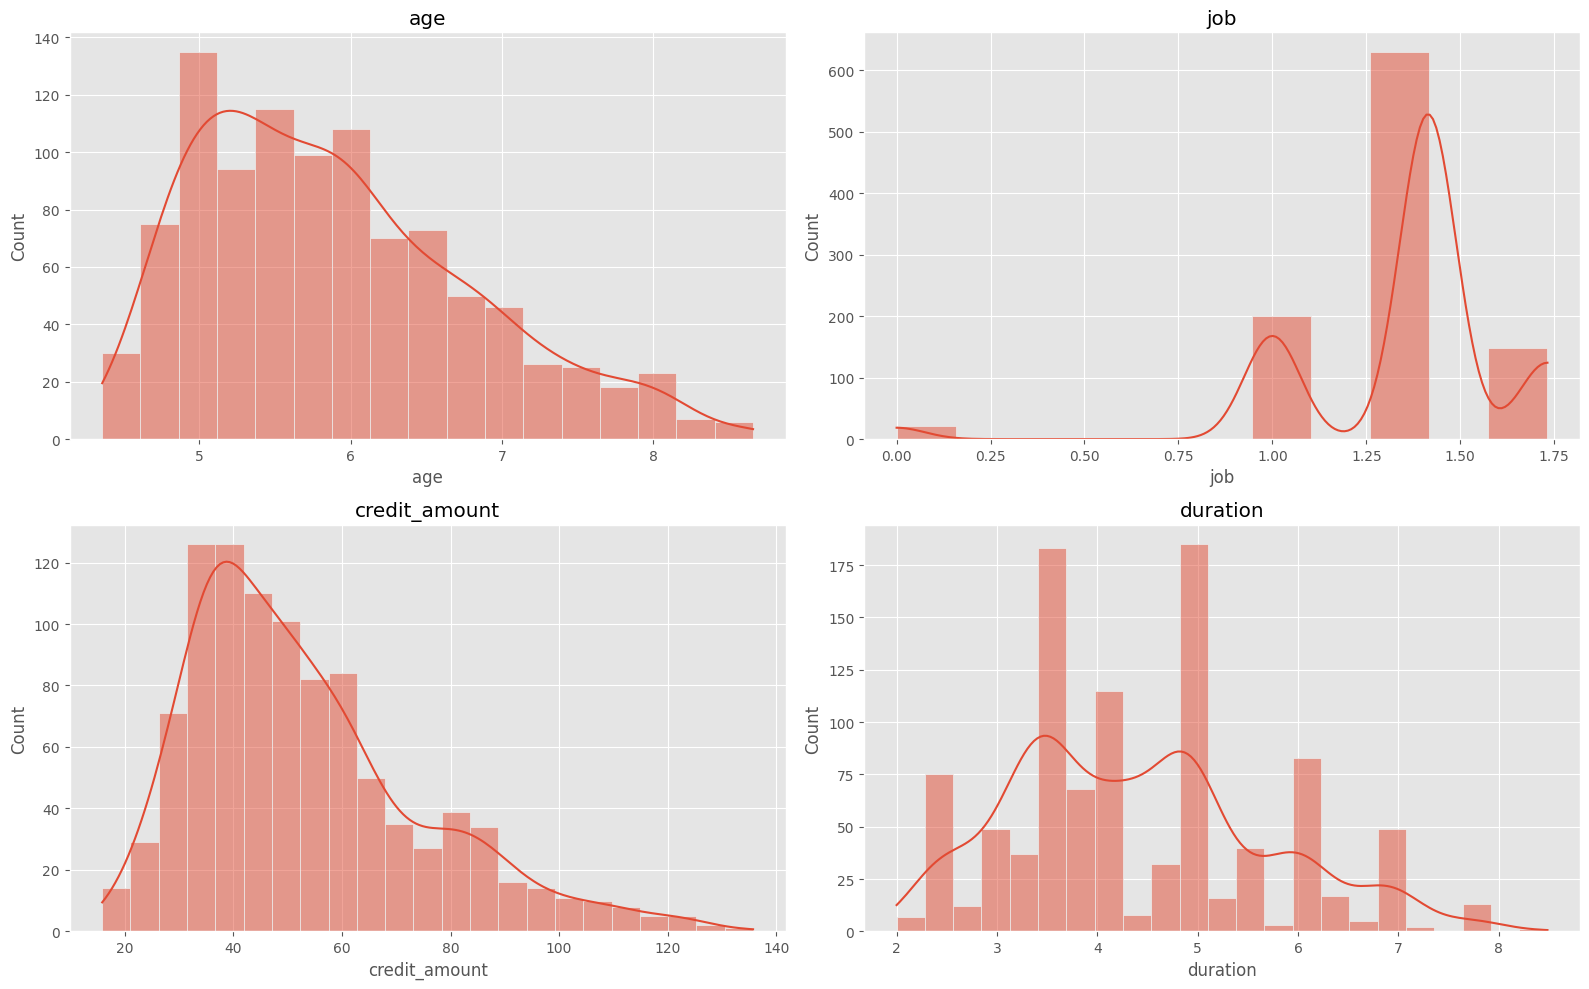

In [112]:
plt.figure(figsize=(16,10))
for colname in enumerate(data.select_dtypes(include=[np.number]).columns):
    plt.subplot(2,2,colname[0]+1)
    sns.histplot(data[colname[1]], kde=True)
    plt.title(colname[1])
    plt.tight_layout()
plt.tight_layout()
plt.show()

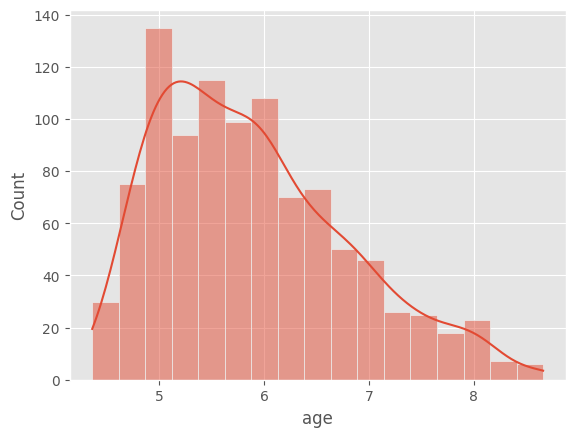

In [113]:
sns.histplot(data['age'], kde = True)
plt.show()

In [114]:
data['age'] = np.sqrt(data['age'])

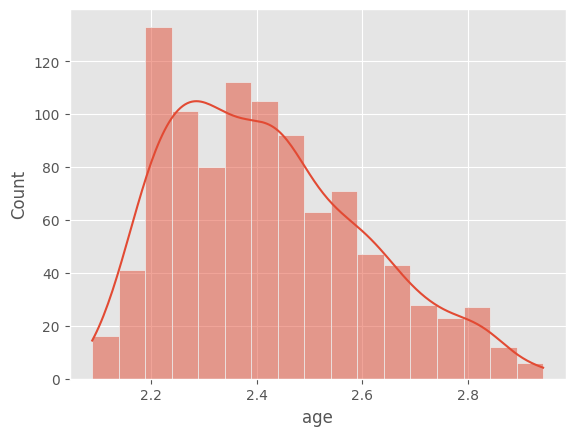

In [115]:
sns.histplot(data['age'], kde = True)
plt.show()

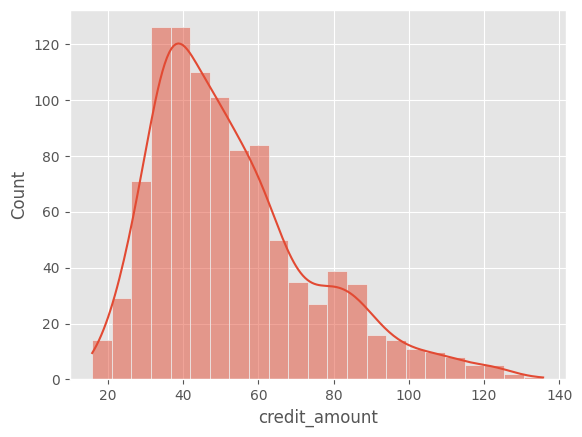

In [116]:
sns.histplot(data['credit_amount'], kde = True)
plt.show()

In [117]:
data['credit_amount'] = np.sqrt(data['credit_amount'])

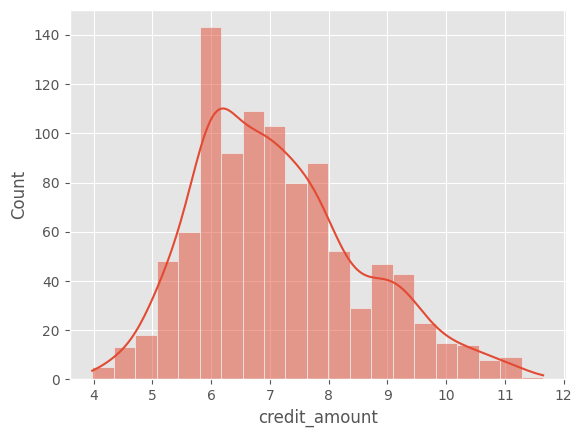

In [118]:
sns.histplot(data['credit_amount'], kde = True)
plt.show()

In [119]:
# Data types of each column
data_types = data.dtypes

# Count of missing values in each column
missing_values = data.isnull().sum()

# Summary statistics
summary_statistics = data.describe(include='all')

data_analysis = {
    "data_types": data_types,
    "missing_values": missing_values,
    "summary_statistics": summary_statistics
}

data_analysis

{'data_types': age                 float64
 sex                  object
 job                 float64
 housing              object
 saving_accounts      object
 checking_account     object
 credit_amount       float64
 duration            float64
 purpose              object
 risk                 object
 dtype: object,
 'missing_values': age                   0
 sex                   0
 job                   0
 housing               0
 saving_accounts     183
 checking_account    394
 credit_amount         0
 duration              0
 purpose               0
 risk                  0
 dtype: int64,
 'summary_statistics':                 age   sex          job housing saving_accounts  \
 count   1000.000000  1000  1000.000000    1000             817   
 unique          NaN     2          NaN       3               4   
 top             NaN  male          NaN     own          little   
 freq            NaN   690          NaN     713             603   
 mean       2.420344   NaN     1.347298 

In [120]:
data.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,2.861006,male,1.414214,own,NaN,little,5.847276,2.449490,radio/TV,good
1,2.165737,female,1.414214,own,little,moderate,8.783093,6.928203,radio/TV,bad
2,2.645751,male,1.000000,own,little,NaN,6.766247,3.464102,education,good
3,2.590020,male,1.414214,free,little,little,9.422347,6.480741,furniture/equipment,good
4,2.698168,male,1.414214,free,little,little,8.353765,4.898979,car,bad


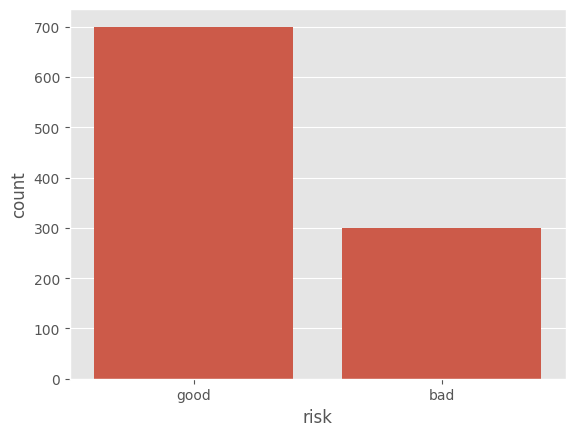

In [121]:
# Check distribution of target variable 'Risk'
sns.countplot(x=data['risk'])
plt.show()


In [122]:
# Our target variable is imbalanced. We will handle this later in the notebook.

In [123]:
data.select_dtypes(exclude=[np.number]).columns

Index(['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose',
       'risk'],
      dtype='object')

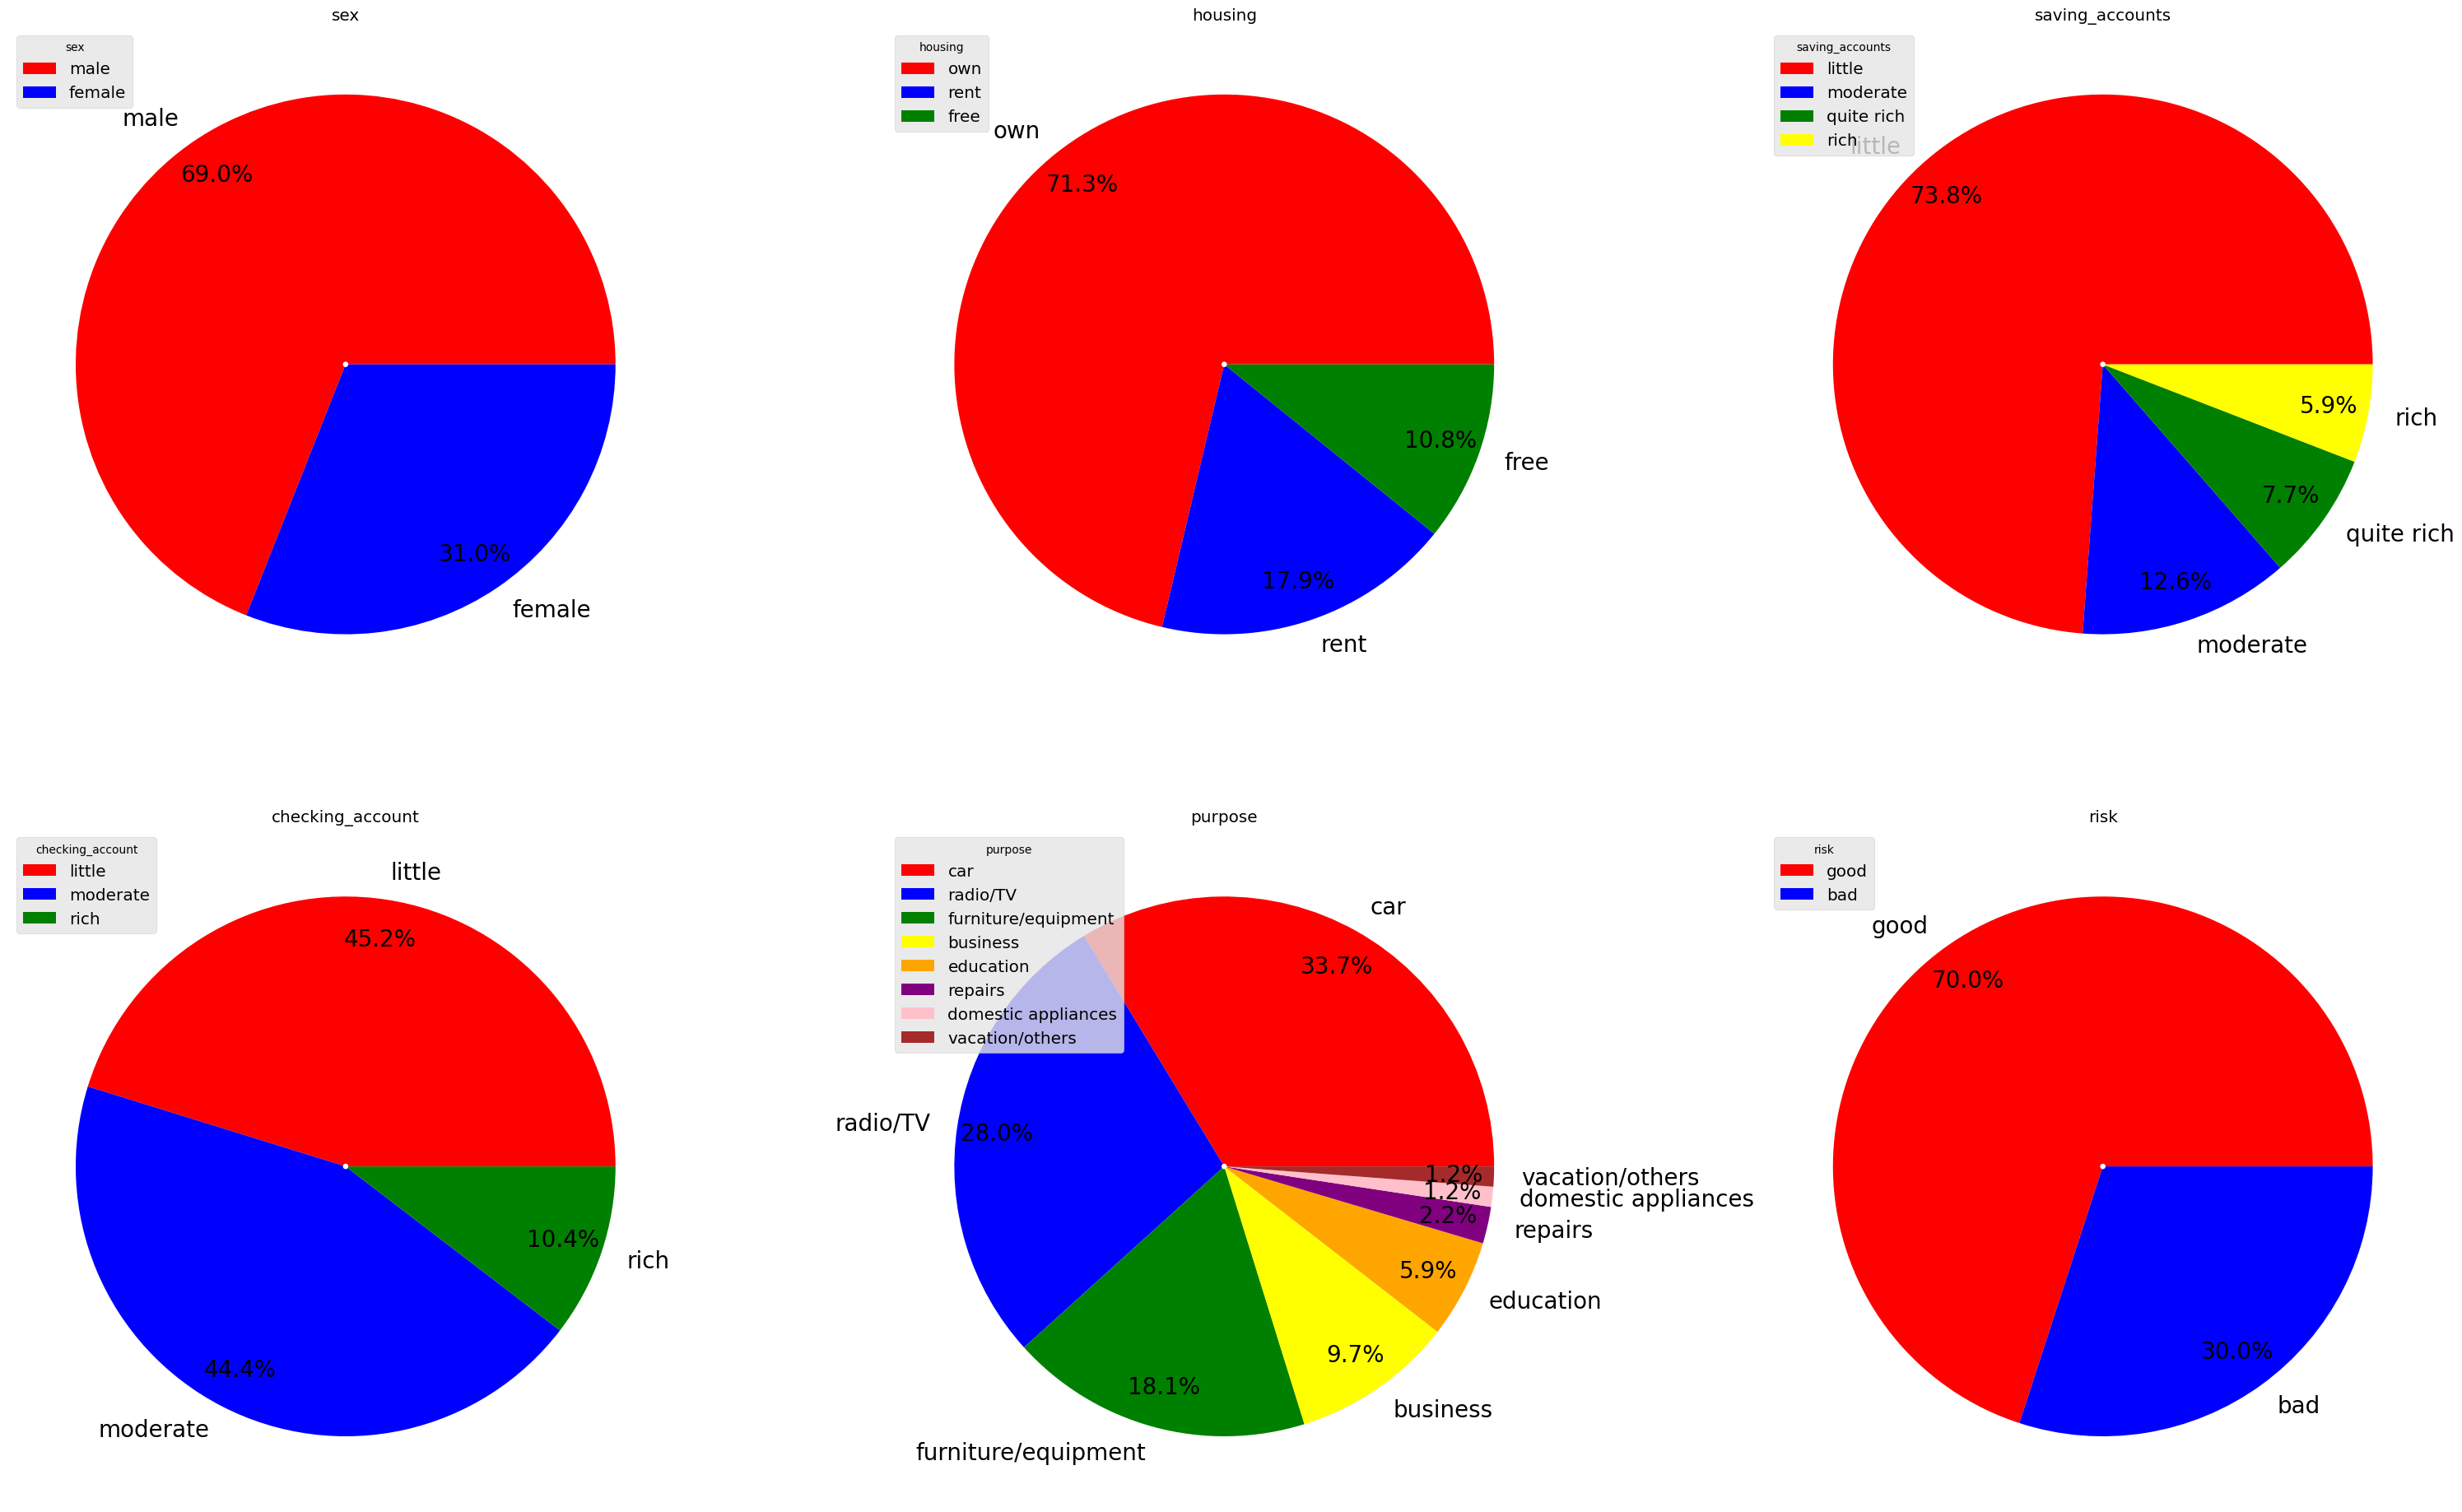

In [124]:
# Piechart distribution of categorical columns

plt.figure(figsize=(30,30))
colors_account = ['red','blue','green','yellow','orange','purple','pink','brown']
for colname in enumerate(data.select_dtypes(exclude=[np.number]).columns):
    plt.subplot(3,3,colname[0]+1)
    # plt.style.use('dark_background')
    plt.pie(data[colname[1]].value_counts(), 
            labels=data[colname[1]].value_counts().index,
            colors=colors_account, 
            autopct='%1.1f%%', 
            pctdistance=0.85,
            wedgeprops=dict(width=0.99),
            textprops={'fontsize': 20})
       
    plt.legend(title=f'{colname[1]}',loc=2,fontsize='x-large')
    plt.tight_layout()  
    plt.title(colname[1])
plt.savefig('pie_chart.png')


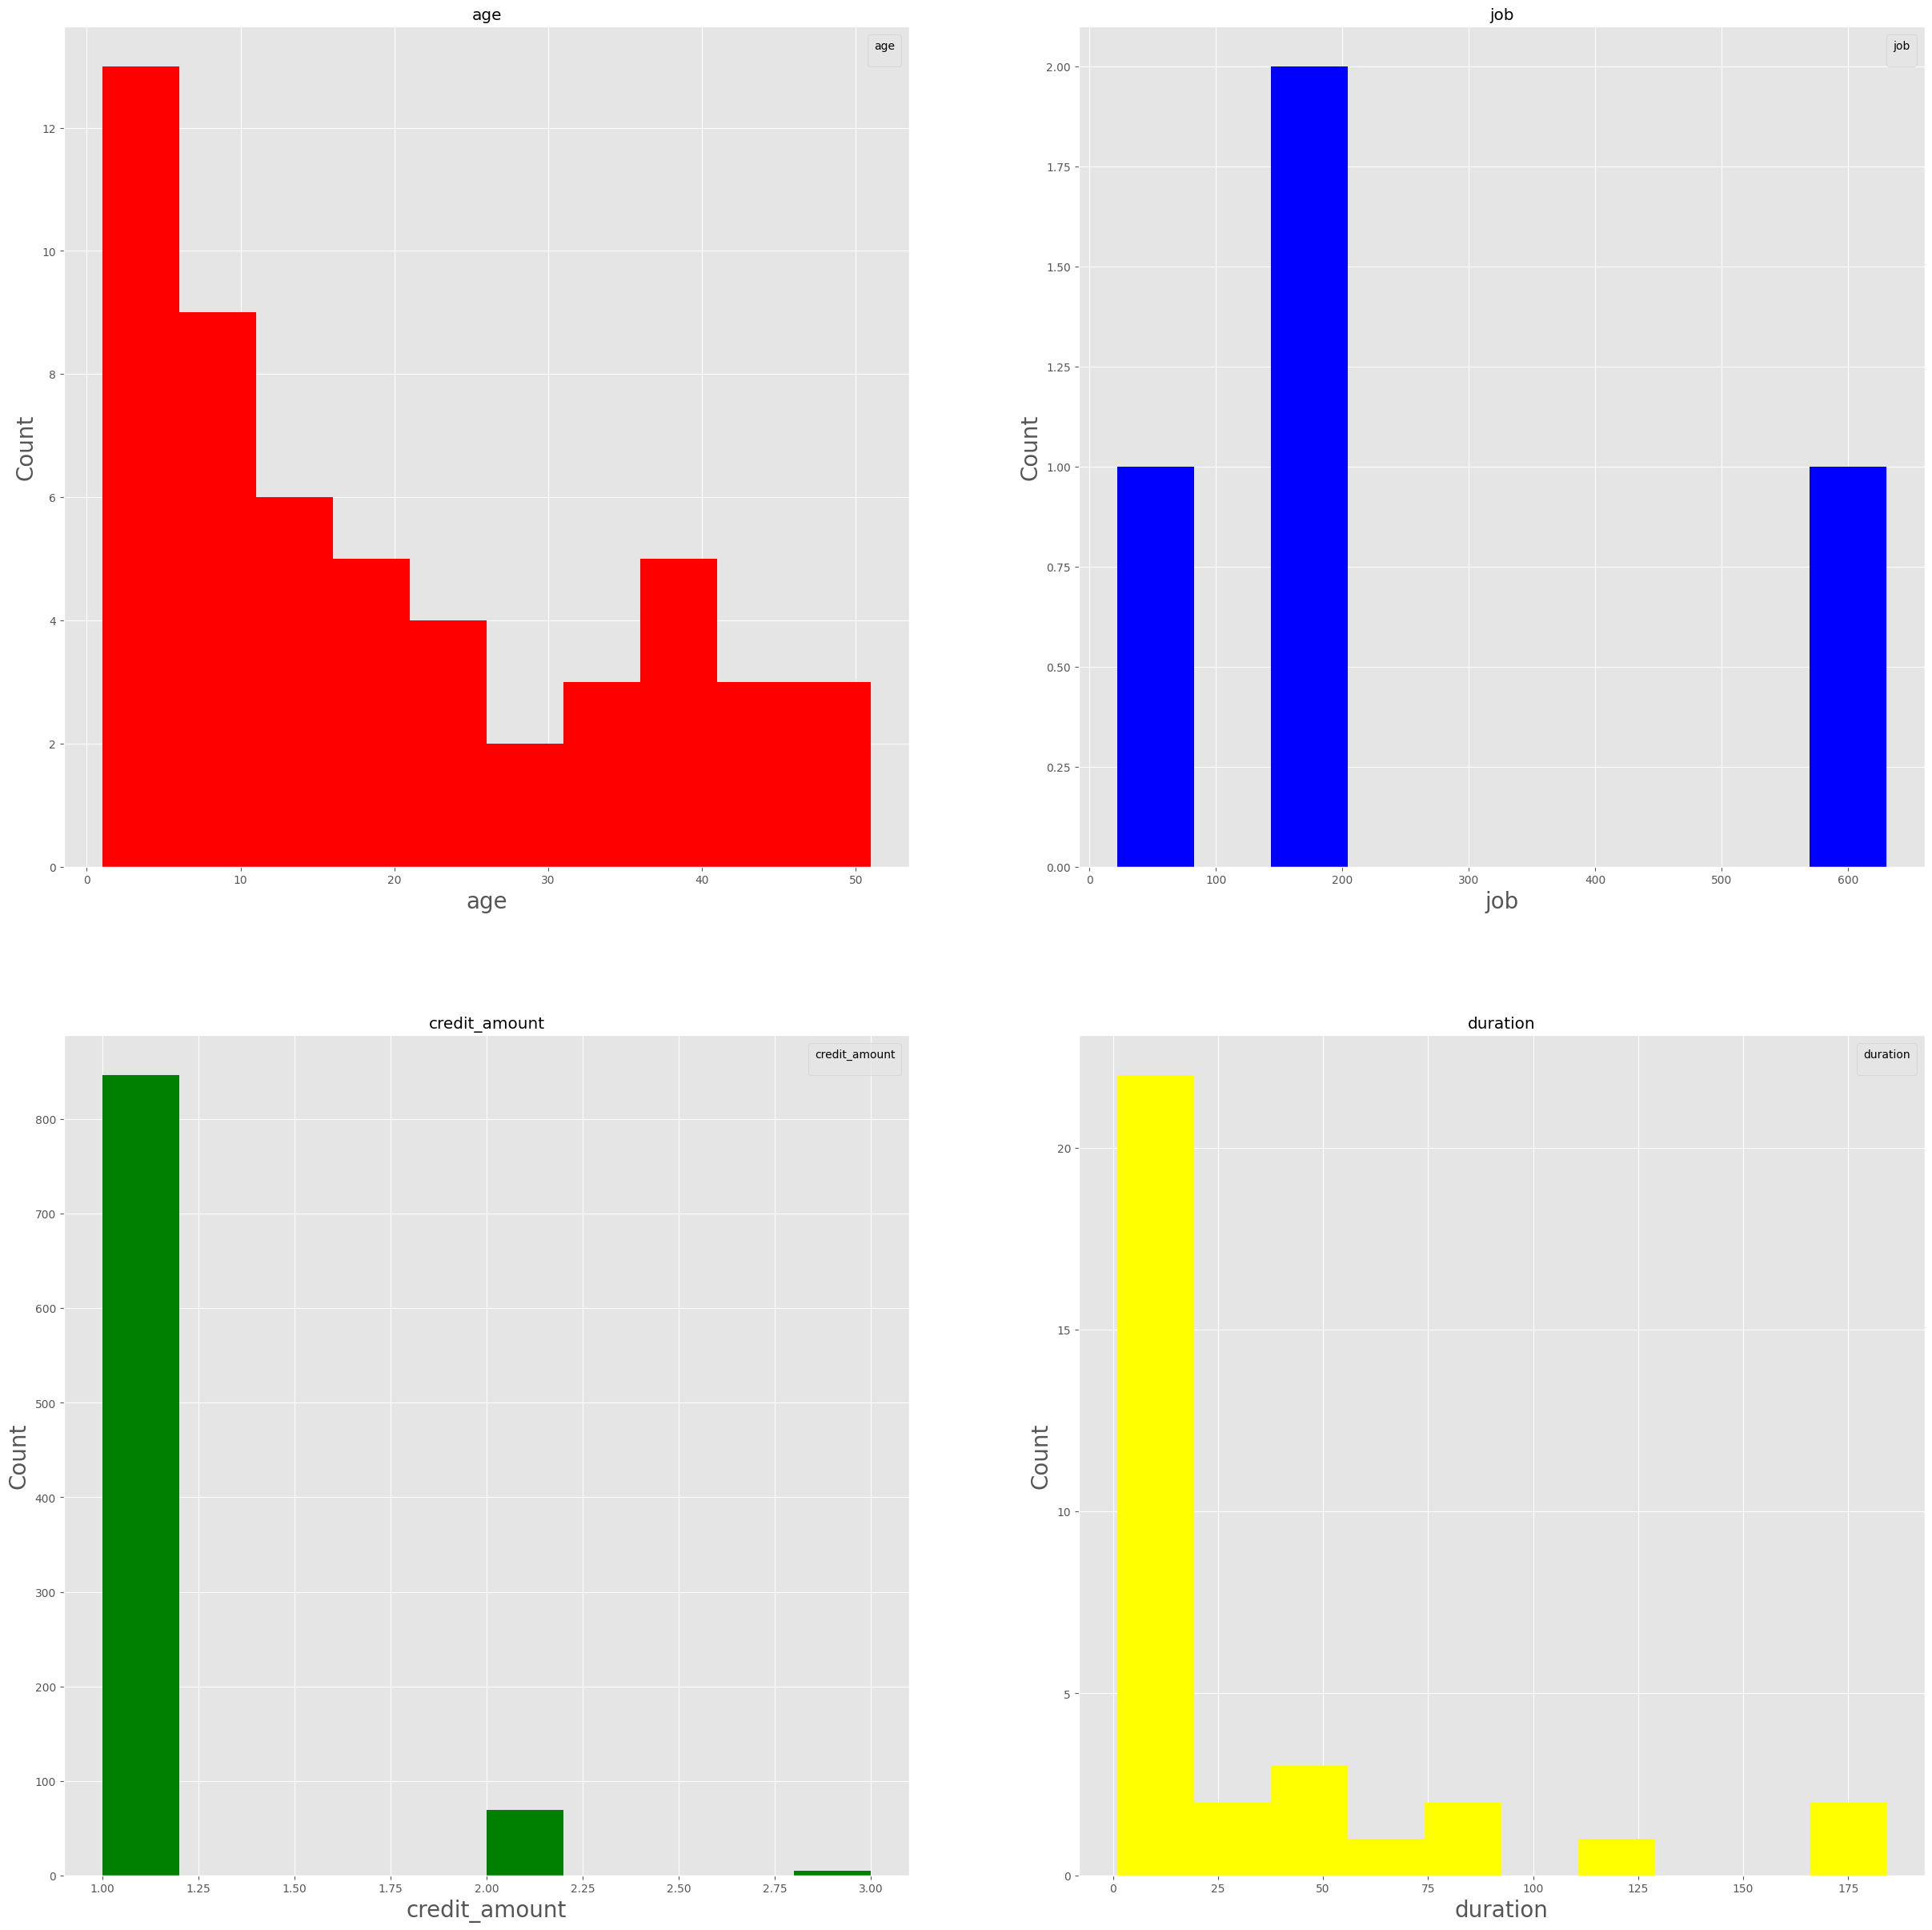

In [125]:
# Histogram distribution of numerical columns
plt.figure(figsize=(30,30))
colors_account = ['red','blue','green','yellow','orange','purple','pink','brown']
plt.style.use('ggplot')
for colname in enumerate(data.select_dtypes(include=[np.number]).columns):
    plt.subplot(2,2,colname[0]+1)
    plt.hist(data[colname[1]].value_counts(), 
            bins=10,
            color=colors_account[colname[0]])  
    plt.xlabel(colname[1],fontsize=20),colors_account[colname[0]]
    plt.ylabel('Count',fontsize=20),colors_account[colname[0]]
    plt.legend(title=f'{colname[1]}',loc=1,fontsize='x-large')
    plt.title(colname[1])
plt.savefig('histogram.png')
plt.show()

# Preprocessing

In [126]:

# Handle missing values
data = data.assign(**{
    'saving_accounts': data['saving_accounts'].fillna('unknown'),
    'checking_account': data['checking_account'].fillna('unknown')
})

# Encode categorical variables
data_encoded = data.copy()
data_encoded['sex'] = data_encoded['sex'].map({'male': 0, 'female': 1})
data_encoded['housing'] = data_encoded['housing'].map({'own': 0, 'rent': 1, 'free': 2})
data_encoded['saving_accounts'] = data_encoded['saving_accounts'].astype('category').cat.codes
data_encoded['checking_account'] = data_encoded['checking_account'].astype('category').cat.codes
data_encoded['purpose'] = data_encoded['purpose'].astype('category').cat.codes
data_encoded['risk'] = data_encoded['risk'].map({'good': 1, 'bad': 0})

# Normalize or scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'job', 'credit_amount', 'duration']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])



In [127]:
data_encoded.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

In [128]:
data_encoded.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,2.392702,0,0.224569,0,4,0,-0.918696,-1.537716,5,1
1,-1.382465,1,0.224569,0,0,1,1.162896,2.004622,5,0
2,1.223915,0,-1.165535,0,0,3,-0.267116,-0.735231,3,1
3,0.921306,0,0.224569,2,0,0,1.616148,1.650712,4,1
4,1.508526,0,0.224569,2,0,0,0.858488,0.399653,1,0


In [129]:
# Generate a profiling report
profile = ProfileReport(data_encoded, title="Credit Risk Germany Data Profiling Report", explorative=True)

# Display the profiling report
profile.to_file("preprocessed_credit_risk_germany_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                       age       sex       job   housing  saving_accounts  \
age               1.000000 -0.187762 -0.005030  0.097964         0.091065   
sex              -0.187762  1.000000 -0.079649  0.033818        -0.034982   
job              -0.005030 -0.079649  1.000000  0.066328         0.007363   
housing           0.097964  0.033818  0.066328  1.000000        -0.003262   
saving_accounts   0.091065 -0.034982  0.007363 -0.003262         1.000000   
checking_account  0.073646 -0.025578  0.051656 -0.121380         0.222867   
credit_amount     0.025978 -0.112392  0.255070  0.169357         0.066157   
duration         -0.039886 -0.077526  0.196456  0.127935         0.048730   
purpose          -0.081320  0.063231 -0.000607 -0.086839        -0.053225   
risk              0.100083 -0.075493 -0.023354 -0.127789         0.178943   

                  checking_account  credit_amount  duration   purpose  \
age                       0.073646       0.025978 -0.039886 -0.081320   
sex   

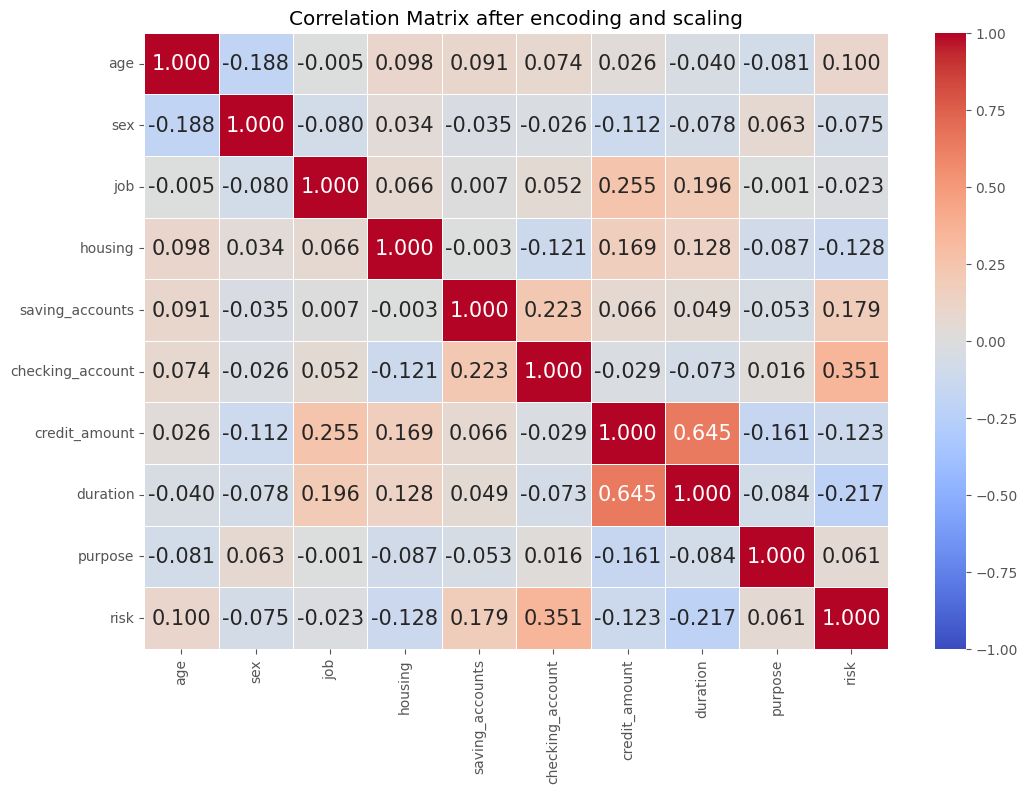

Correlation with target variable 'Risk':
risk                1.000000
checking_account    0.350847
saving_accounts     0.178943
age                 0.100083
purpose             0.061145
job                -0.023354
sex                -0.075493
credit_amount      -0.122883
housing            -0.127789
duration           -0.217172
Name: risk, dtype: float64


In [130]:

# Create correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True,
               cmap='coolwarm', 
               cbar=True, 
               annot_kws={'fontsize':15}, 
               vmin=-1, 
               vmax=1, 
               linewidths=.4,fmt='.3f')
plt.title('Correlation Matrix after encoding and scaling')
plt.show()

# Check correlation with the target variable 'Risk'
correlation_with_target = correlation_matrix['risk'].sort_values(ascending=False)


print("Correlation with target variable 'Risk':")
print(correlation_with_target)


Identify key variables influencing credit scoring using correlation matrices and visualizations (e.g., heatmaps, pair plots).

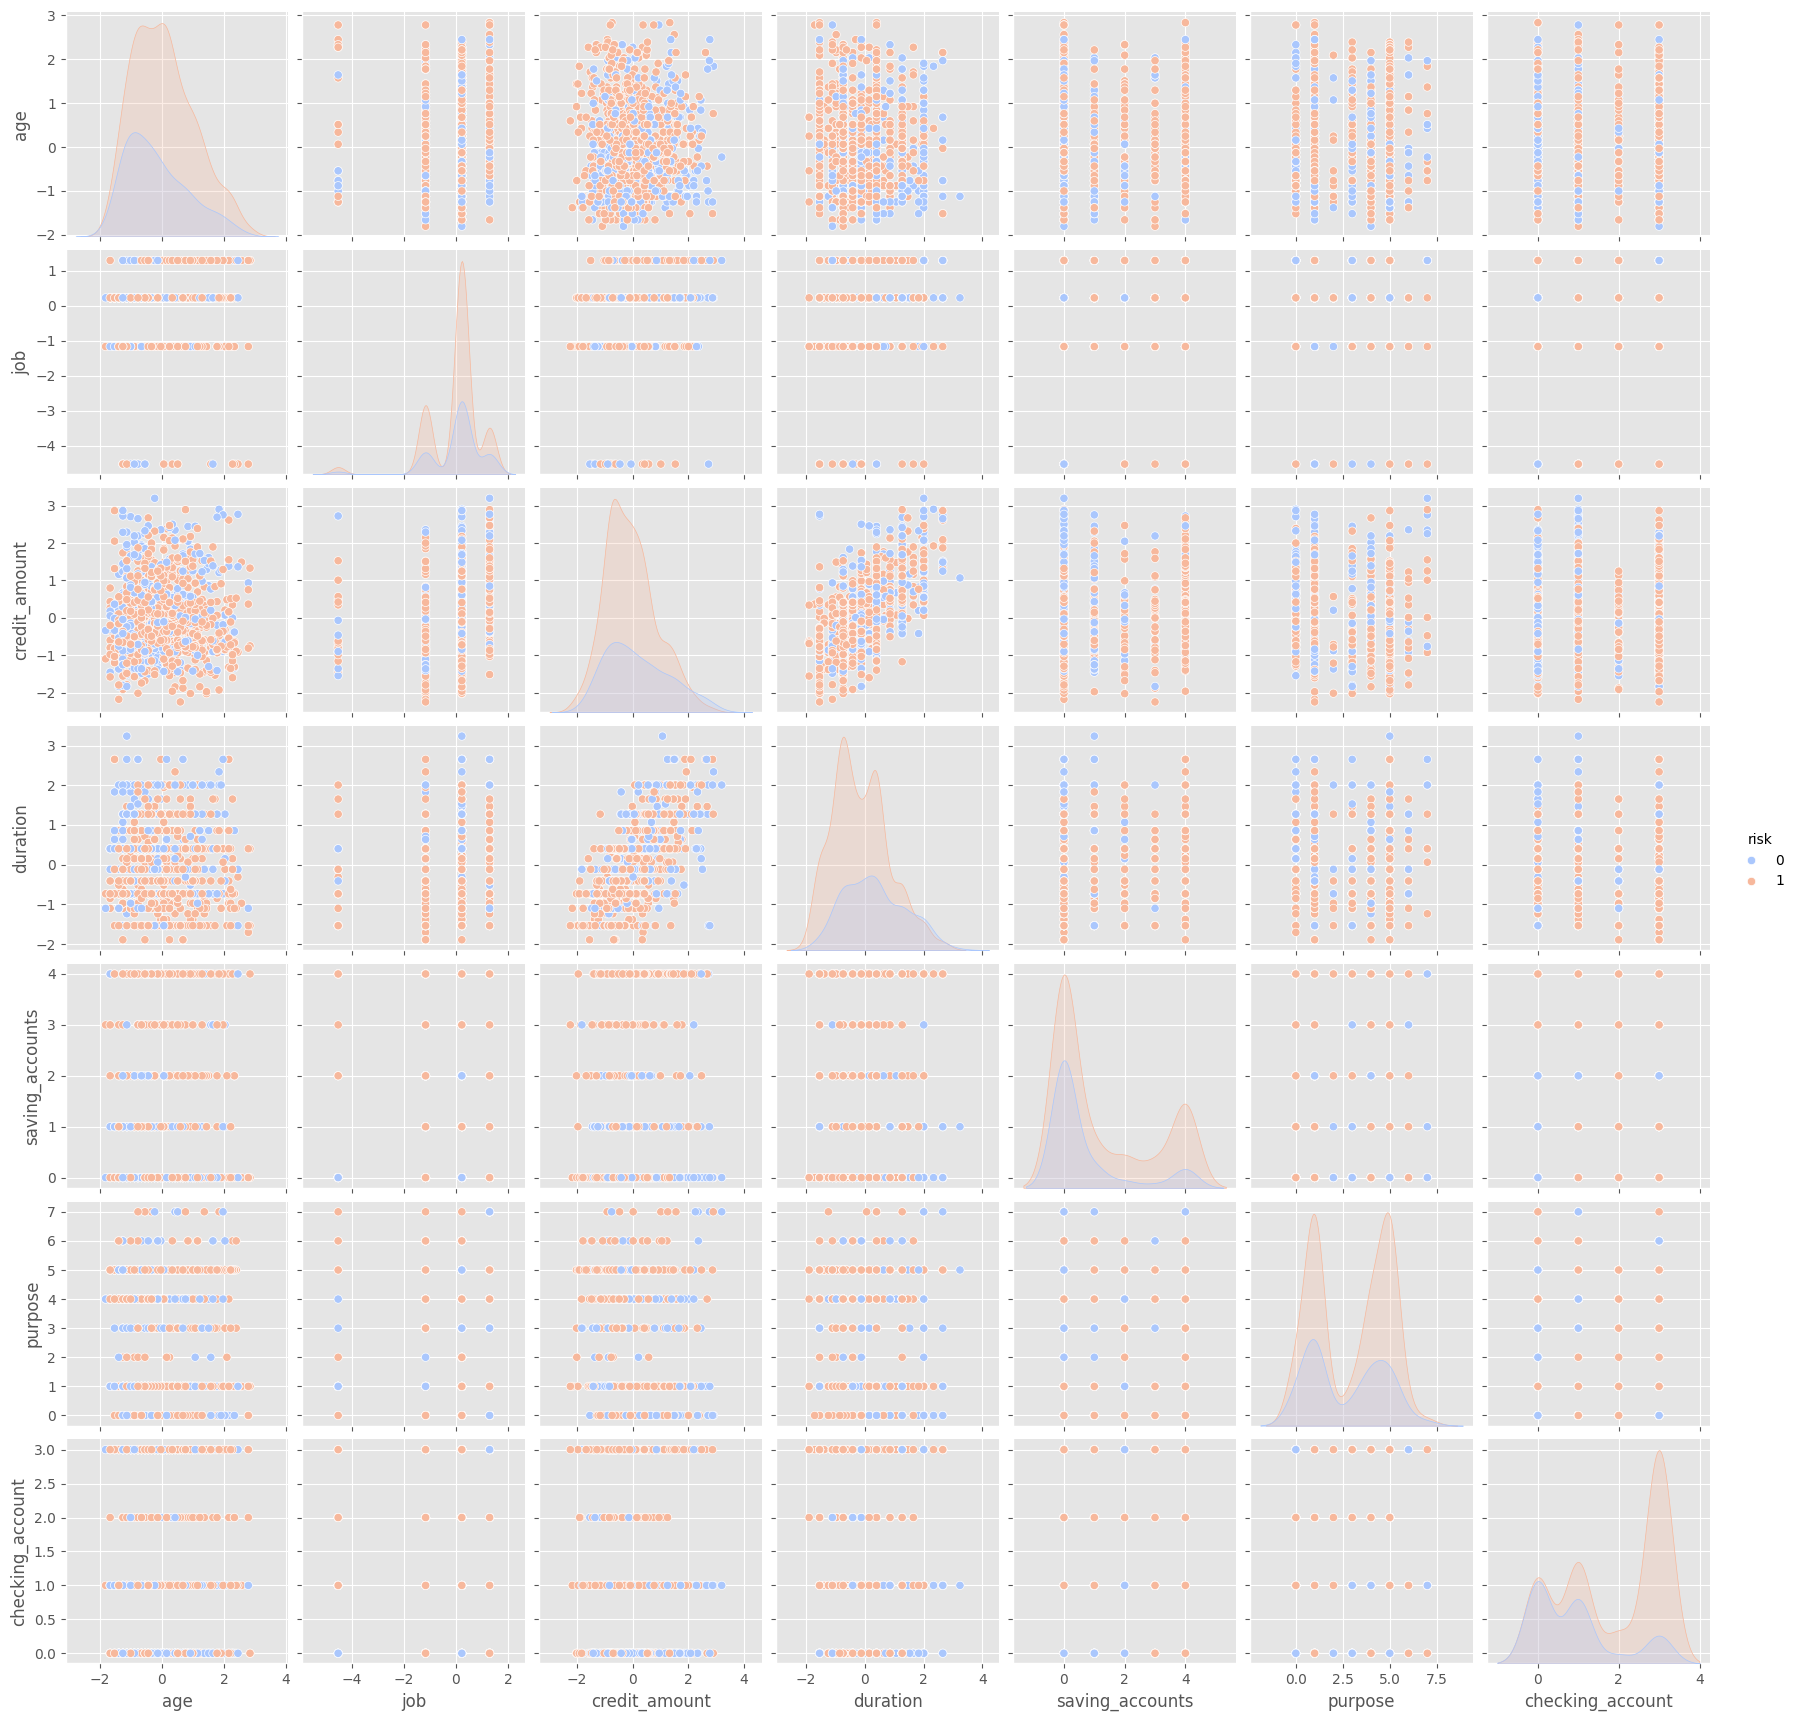

In [131]:

# Pair plot for selected features
selected_features = ['age', 'job', 'credit_amount', 'duration', 'saving_accounts','purpose','checking_account','risk']
sns.pairplot(data_encoded[selected_features], hue='risk', palette='coolwarm')
plt.show()

In [132]:
!pip install imbalanced-learn

In [ ]:

# Separate the features and target variable
X = data_encoded.drop('risk', axis=1)
y = data_encoded['risk']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update data_encoded with the resampled data
data_encoded = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['risk'])], axis=1)

# Verify the balance of the target variable
print(data_encoded['risk'].value_counts())


risk
1    700
0    700
Name: count, dtype: int64


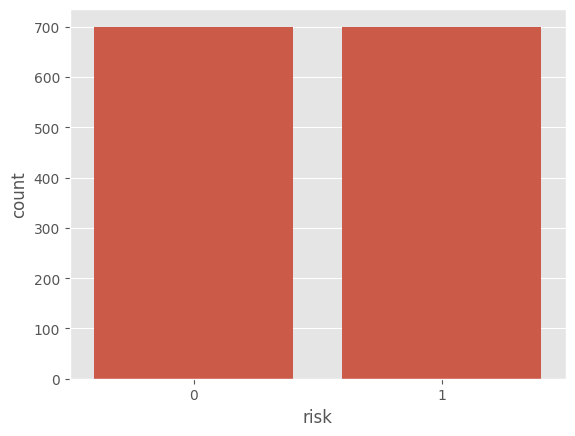

In [134]:
# Check distribution of target variable 'Risk' after handling class imbalance
sns.countplot(x=data_encoded['risk'])
plt.show()

In [135]:
# Split the dataset into training and testing sets
X = data_encoded.drop('risk', axis=1)
y = data_encoded['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelling

In [ ]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(),

}

# Train and evaluate models
best_model = None
best_score = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.6750
Precision: 0.7266
Recall: 0.6242
F1-score: 0.6715
AUC-ROC: 0.6785
[[96 35]
 [56 93]]
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       131
           1       0.73      0.62      0.67       149

    accuracy                           0.68       280
   macro avg       0.68      0.68      0.67       280
weighted avg       0.68      0.68      0.67       280



Model: Random Forest
Accuracy: 0.8000
Precision: 0.8550
Recall: 0.7517
F1-score: 0.8000
AUC-ROC: 0.8033
[[112  19]
 [ 37 112]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       131
           1       0.85      0.75      0.80       149

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.81      0.80      0.80       280



Model: XGBoost
Accuracy: 0.8179
Precision: 0.8551
Recall: 0.7919
F1-score: 0.8223
AUC-

## Model optimizations

In [ ]:

# Define the XGBClassifier wrapper for sklearn compatibility
class XGBClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        # Define the parameters explicitly in the constructor
        self.model = XGBClassifier(  **kwargs)

        
    def fit(self, X, y):
        # Fit the XGBClassifier model
        self.model.fit(X, y)
        return self

    def predict(self, X):
        # Predict using the fitted model
        return self.model.predict(X)

    def predict_proba(self, X):
        # Predict probabilities using the fitted model
        return self.model.predict_proba(X)

    def score(self, X, y):
        # Return the accuracy score using the model
        return self.model.score(X, y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifierWrapper(eval_metric='logloss'),  # Using the wrapped XGBClassifier
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Extra Trees": ExtraTreesClassifier(),
}

# Train and evaluate models
best_model = None
best_score = 0
for name, model in models.items():
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")
    
    if auc_roc > best_score:
        best_score = auc_roc
        best_model = model

# Save the best-performing model using pickle
with open("best_model.pkl", "wb") as f:
    dill.dump(model, f)

print(f"Best model saved: {best_model}")


Logistic Regression: 0.8002 (0.0352)
Model: Logistic Regression
Accuracy: 0.6750
Precision: 0.7266
Recall: 0.6242
F1-score: 0.6715
AUC-ROC: 0.6785
[[96 35]
 [56 93]]
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       131
           1       0.73      0.62      0.67       149

    accuracy                           0.68       280
   macro avg       0.68      0.68      0.67       280
weighted avg       0.68      0.68      0.67       280



Random Forest: 0.8829 (0.0359)
Model: Random Forest
Accuracy: 0.7964
Precision: 0.8594
Recall: 0.7383
F1-score: 0.7942
AUC-ROC: 0.8004
[[113  18]
 [ 39 110]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       131
           1       0.86      0.74      0.79       149

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.81      0.80      0.80       280



XGBoost: nan (nan)